### Project Exploratory data analysis 

- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data cleaning**
    > organize attributes into appripriate data types (e.g., numerical, categorical, datatime, text, image, ...) <br>
    > missing value and outlier detection <br>
    
- **Part-3: Data transformation**
    > normalize numerical data <br>
    
- **Part-4: Feature engineering**
    > directly use numerical data

- **Part-5: Additional analysis**
    > colinearty check <br>

### Dataset shared link
- https://github.com/jcpeterson/omi/blob/main/attribute_means.csv
- https://github.com/yihanww/MACS30100/blob/main/project/dlatents.npy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

In [2]:
# read features data from file to a pandas dataframe
features_df = pd.read_csv('./attribute_means.csv') 

In [4]:
# read actual weight data from file to a pandas dataframe
weight = np.load("/Users/han/Desktop/latents/dlatents.npy")

In [5]:
# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
features_df.shape

(1004, 35)

In [6]:
# get an overview of the top-n rows/samples
features_df.head()

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,1,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,18.970588,...,18.828571,12.470588,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000
1,2,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,75.771429,...,70.325000,63.236842,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514
2,3,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,23.135135,...,44.375000,27.108108,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683
3,4,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,59.526316,...,61.666667,60.352941,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976
4,5,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,82.600000,...,14.162162,15.121212,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778


In [7]:
# check the shape of the data frame: row: #samples (short for number of samples), column: #attributes (short for number of attributes)
weight.shape

(3039, 512)

In [8]:
# I only need the first 1004 rows because the features are rated based on these 1004 stimuli
weight = weight[:1004]
weight

array([[ 0.01608254, -0.20062245, -0.29112384, ..., -0.17773119,
        -0.06716575, -0.07059635],
       [-0.00166759, -0.02775493, -0.18739995, ..., -0.20235142,
        -0.09695578, -0.34975681],
       [-0.20952941,  0.01885662,  0.61291254, ...,  0.53577298,
         0.41925639,  0.91552621],
       ...,
       [-0.03168365, -0.01862339, -0.02364639, ..., -0.14452291,
        -0.08473014,  0.2162483 ],
       [ 0.1840674 ,  0.28043327, -0.20540014, ..., -0.08562395,
        -0.17729175, -0.00313852],
       [-0.02309644,  0.17632581, -0.09819295, ..., -0.31139478,
        -0.15932131, -0.2066813 ]])

### Data cleaning

#### check missing values

In [9]:
null_sum = features_df.isnull().sum()
null_sum

stimulus          0
trustworthy       0
attractive        0
dominant          0
smart             0
age               0
gender            0
weight            0
typical           0
happy             0
familiar          0
outgoing          0
memorable         0
well-groomed      0
long-haired       0
smug              0
dorky             0
skin-color        0
hair-color        0
alert             0
cute              0
privileged        0
liberal           0
asian             0
middle-eastern    0
hispanic          0
islander          0
native            0
black             0
white             0
looks-like-you    0
gay               0
electable         0
godly             0
outdoors          0
dtype: int64

No missing values need to be dropped.

#### organize columns into different data types
The .dtype attribute shows that the current data type for all columns are "int64", I don't have to convert the columns into different data types.   

#### process numerical data

In [10]:
# get the column names
column_names = features_df.columns
column_names_list = features_df.columns.tolist()

# print the column names
print(column_names)
print(column_names_list)

Index(['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age',
       'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing',
       'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky',
       'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal',
       'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black',
       'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors'],
      dtype='object')
['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age', 'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing', 'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky', 'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal', 'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black', 'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors']


In [11]:
num_col = ['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age',
       'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing',
       'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky',
       'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal',
       'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black',
       'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors']

Convert the numerical columns to the "float" data type 

In [12]:
features_df[num_col] = features_df[num_col].astype('float')
features_df[num_col]

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
0,1.0,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,18.970588,...,18.828571,12.470588,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000
1,2.0,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,75.771429,...,70.325000,63.236842,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514
2,3.0,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,23.135135,...,44.375000,27.108108,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683
3,4.0,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,59.526316,...,61.666667,60.352941,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976
4,5.0,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,82.600000,...,14.162162,15.121212,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1000.0,51.678161,45.970588,59.171429,51.925000,40.142857,86.257143,53.235294,73.714286,53.647059,...,44.146341,15.228571,19.256410,6.647059,81.857143,26.371429,29.055556,57.975000,60.757576,14.923077
1000,1001.0,76.918605,66.928571,37.105263,53.864865,16.294118,11.200000,44.138889,57.228571,76.714286,...,51.600000,57.738095,45.717949,10.289474,58.500000,23.085714,18.783784,27.243902,68.800000,87.636364
1001,1002.0,50.318182,44.902439,63.578947,64.736842,37.969697,82.297297,51.333333,52.891892,34.450000,...,58.121212,77.078947,60.200000,18.500000,13.351351,16.515152,24.378378,63.871795,49.900000,12.914286
1002,1003.0,55.551724,69.842105,54.625000,48.250000,26.029412,8.307692,41.358974,54.085714,41.538462,...,68.000000,51.944444,44.375000,11.685714,47.027027,22.230769,25.400000,56.852941,63.435897,17.714286


In [13]:
# the following columns now all have the numerical data types
features_df[num_col].dtypes

stimulus          float64
trustworthy       float64
attractive        float64
dominant          float64
smart             float64
age               float64
gender            float64
weight            float64
typical           float64
happy             float64
familiar          float64
outgoing          float64
memorable         float64
well-groomed      float64
long-haired       float64
smug              float64
dorky             float64
skin-color        float64
hair-color        float64
alert             float64
cute              float64
privileged        float64
liberal           float64
asian             float64
middle-eastern    float64
hispanic          float64
islander          float64
native            float64
black             float64
white             float64
looks-like-you    float64
gay               float64
electable         float64
godly             float64
outdoors          float64
dtype: object

Since the actual weight data is my target data, I have to drop certain columns that are not needed to train the model : "stimulus" and "weight"

In [14]:
features_df = features_df.drop(['stimulus', 'weight'], axis = 1)


In [15]:
# check the shape of dataframe after dropping
features_df.shape

(1004, 33)

Since I only have 1004 rows in total, TA Yingzi suggested me not to drop outliers at this point. 

### Data transformation


#### Normalize numerical data

In [16]:
# take "trustworthy" as test

<Axes: xlabel='trustworthy', ylabel='Count'>

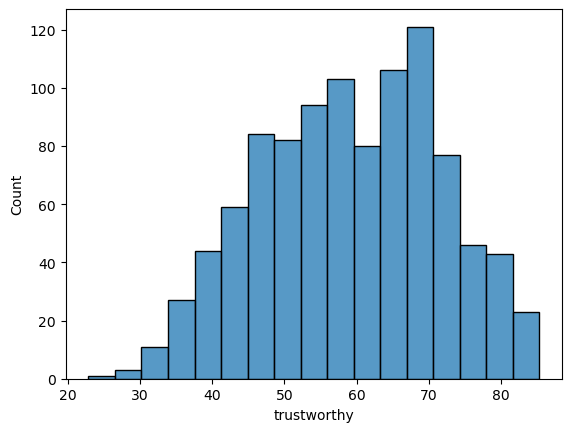

In [17]:
# check the distribution of the "trustworthy" (before normalization)
sns.histplot(features_df['trustworthy'])

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_df['trustworthy'] = scaler.fit_transform(features_df[['trustworthy']].values)

<Axes: xlabel='trustworthy', ylabel='Count'>

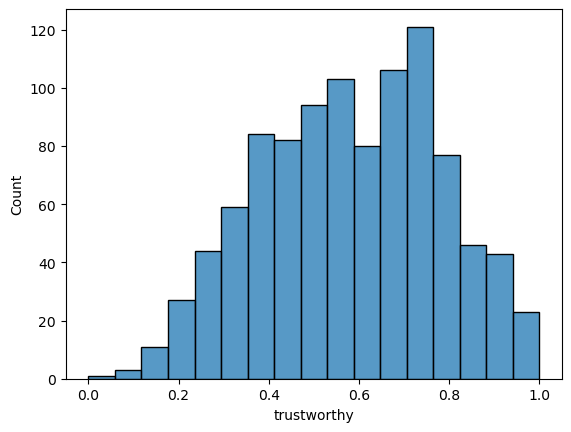

In [19]:
# check the distribution of the "trustworthy" (after normalization)
sns.histplot(features_df['trustworthy'])

Create a for loop to do normalization for each column of the df


In [20]:
# create the MinMaxScaler object
scaler = MinMaxScaler()

# loop through each column and scale
for column in features_df.columns:
    features_df[column] = scaler.fit_transform(features_df[[column]])

Check if the scaler successfully transformed other columns

<Axes: xlabel='smart', ylabel='Count'>

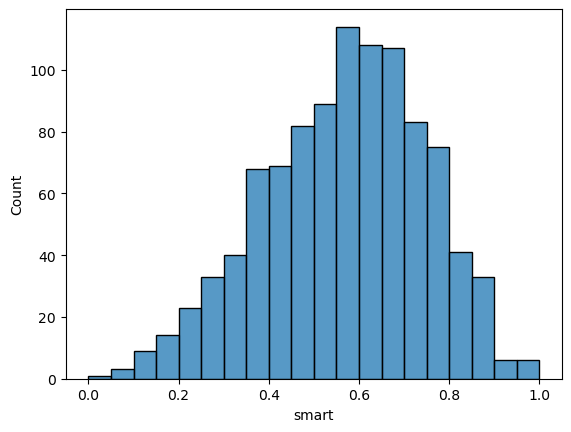

In [21]:
# check the distribution of the "smart" (after normalization)
sns.histplot(features_df['smart'])

Normalize "weight" array

In [22]:
normalized_weight = scaler.fit_transform(weight)

Check if the "weight" array has been normalized

In [23]:
normalized_weight

array([[0.20182256, 0.20726262, 0.1319596 , ..., 0.16731856, 0.20989499,
        0.14459797],
       [0.19269576, 0.27825448, 0.15925451, ..., 0.15610917, 0.19794826,
        0.05780439],
       [0.08581692, 0.29739654, 0.3698565 , ..., 0.49217122, 0.40496542,
        0.45119262],
       ...,
       [0.17726204, 0.28200455, 0.20234621, ..., 0.18243802, 0.20285112,
        0.23378063],
       [0.28819738, 0.40481876, 0.15451776, ..., 0.20925424, 0.16573103,
        0.16557124],
       [0.18167743, 0.36206474, 0.1827293 , ..., 0.10646261, 0.17293774,
        0.1022879 ]])

### Feature Engineering

#### Numerical data
- directly use the values

### Additional Analysis (optional)

In [24]:
# reload the features dataframe to test for correlation
features_df_cor = pd.read_csv('./attribute_means.csv') 

I want to calculate "weight" from the current features. Thus, I want to check which features in the originally data frame are most correlated with perceived weight feature. 

Check the correlations among multiple columns to predict which features are potentially entail more importance in the model.

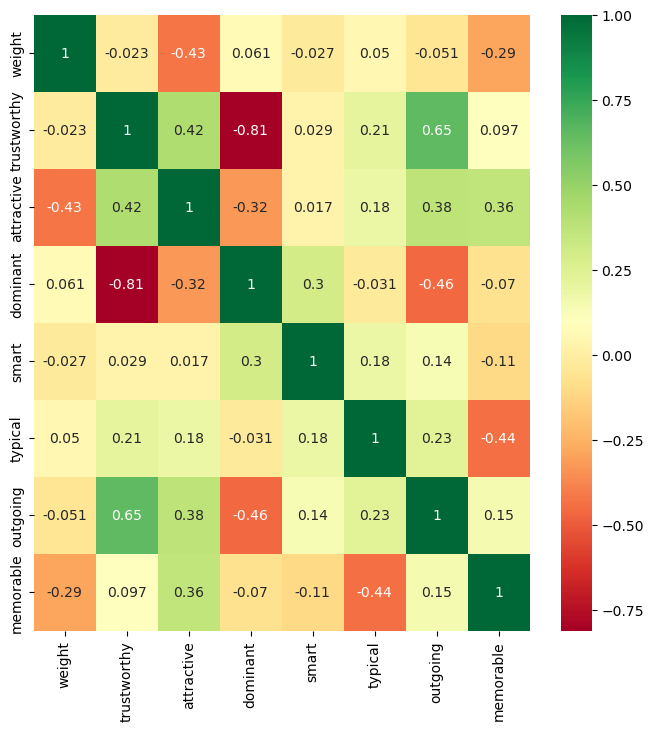

In [25]:
_, ax = plt.subplots(figsize=(8,8))
columns = ['weight', 'trustworthy', 'attractive', 'dominant', 'smart', 'typical','outgoing','memorable']
sns.heatmap(features_df_cor[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

According to the heat map:
- perceived "attractive" has a moderate negative correlation with the weight feature.
- perceived "smart" and "trustworthy" seems don't have vert strong correlation with the weight feature.


